# Parameter Optimization

We have came up with a basic implementation of the schedulers in Python. Now we want to play around with the time quantum for Round Robin scheduling and $\alpha$ in Shortest Job First scheduling to obtain the optimal values.

We do so by naively running the simulation multiple times and plotting the average waiting time caused by both scheduling algorithm. Then we pick the optimal from there. It is also interesting to note how the performance changes as we vary these parameters.

## Imports

In [1]:
%matplotlib inline

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from simulator.schedulers import RoundRobin, SJF
from simulator.core.process import Process
from copy import deepcopy
import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def read_inputs(filename):
    """
    Reads inputs from a file and converts them into Process objects.
    """
    res = []
    with open(filename) as f:
        for line in f:
            array = line.split()
            if len(array) != 3:
                print ("wrong input format")
                exit()
            res += [Process(int(array[0]), int(array[1]), int(array[2]))]

    return res

In [3]:
def run_simulation(scheduler, processes):
    """Runs a simulation.
    
    Returns:
    - Average wait time at the end of the simulation.
    """
    scheduler.schedule(deepcopy(processes))
    avg_waiting_time = scheduler.avg_waiting_time
    
    return avg_waiting_time

## Read Inputs

We will use the sample inputs provided by the assignment specification.

In [7]:
processes = read_inputs('../examples/test1.in')
print('Total {} processes'.format(len(processes)))

Total 16 processes


Just to provide a brief overview of how long each process takes.

Text(0,0.5,'Burst Time')

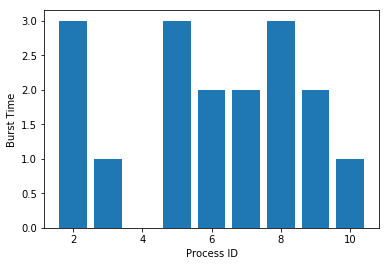

In [19]:
plt.bar([proc.burst_time for proc in processes], [proc.id for proc in processes])
plt.xlabel('Process ID')
plt.ylabel('Burst Time')

## Round Robin

We first play around with the optimal time quantum for Round Robin scheduling.

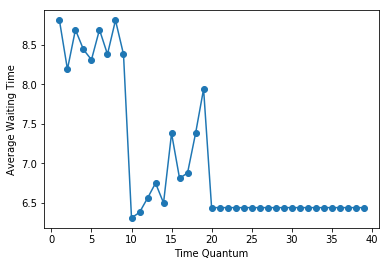

In [34]:
x = [i for i in range(1, 40)]
y = [run_simulation(RoundRobin(time_quantum=q), processes) for q in x]

plt.ylabel('Average Waiting Time')
plt.xlabel('Time Quantum')
plt.plot(x, y, marker='o')

It's interesting to note that at large quantum sizes, RR reduces into a FCFS scheduler.

In [35]:
min(x, key=lambda v: y[v-1])

10

## Shortest Job First

Now we try to find the best alpha value for our Shortest Job First scheduler.

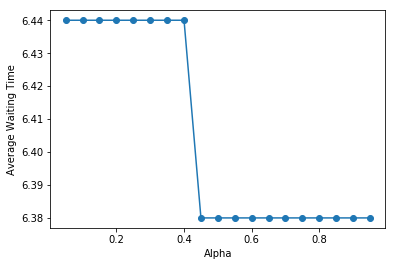

In [23]:
x = [i/20 for i in range(1, 20)]
y = [run_simulation(SJF(alpha=a), processes) for a in x]

plt.ylabel('Average Waiting Time')
plt.xlabel('Alpha')
plt.plot(x, y, marker='o')

In [28]:
min(x, key=lambda v: y[int(v*20-1)])

0.45